<a href="https://colab.research.google.com/github/AUT-Student/SML-Project/blob/main/SML_Project_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset

In [2]:
!gdown 1mFilhzDbZqb4xC6ifBLPjha1Svmqcr9X

Downloading...
From: https://drive.google.com/uc?id=1mFilhzDbZqb4xC6ifBLPjha1Svmqcr9X
To: /content/SML_Project_Dataset.zip
100% 400k/400k [00:00<00:00, 121MB/s]


In [3]:
!unzip /content/SML_Project_Dataset.zip

Archive:  /content/SML_Project_Dataset.zip
  inflating: Kekhak.csv              
  inflating: Foolad.csv              
  inflating: Shasta.csv              
  inflating: Khodro.csv              
  inflating: Atlas.csv               


In [6]:
dataset = pd.read_csv("/content/Foolad.csv")

In [7]:
dataset["Return"] = dataset["<CLOSE>"].diff()/dataset["<CLOSE>"]

In [8]:
dataset = dataset[(dataset["<DTYYYYMMDD>"] >= 20210101) & (dataset["<DTYYYYMMDD>"] <= 20221230)]

In [9]:
dataset

,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>,Return
21,S*Mobarakeh.Steel,20221228,6100.0,6290.0,6100.0,6280.0,2584212227560,411315121,12332,D,5880.0,6290.0,0.049363
22,S*Mobarakeh.Steel,20221226,5890.0,5940.0,5760.0,5880.0,708241517020,120347075,8243,D,5930.0,5880.0,-0.068027
23,S*Mobarakeh.Steel,20221225,6000.0,6050.0,5830.0,5930.0,835853304270,140889964,9149,D,5830.0,5880.0,0.008432
24,S*Mobarakeh.Steel,20221224,5600.0,5910.0,5570.0,5830.0,1127137514960,193191975,10551,D,5530.0,5910.0,-0.017153
25,S*Mobarakeh.Steel,20221221,5490.0,5610.0,5450.0,5530.0,362671842750,65637455,4222,D,5550.0,5540.0,-0.054250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,S*Mobarakeh.Steel,20210106,11850.0,12280.0,11710.0,11780.0,2254561888270,191378399,28550,D,12320.0,11720.0,0.044143
469,S*Mobarakeh.Steel,20210105,12610.0,12750.0,12060.0,12320.0,1737493836030,141067026,22845,D,12690.0,12060.0,0.043831
470,S*Mobarakeh.Steel,20210104,12720.0,13000.0,12570.0,12690.0,1074519281720,84691004,20590,D,12640.0,12640.0,0.029157
471,S*Mobarakeh.Steel,20210103,12410.0,13130.0,12320.0,12640.0,1188881697180,94039761,20571,D,12600.0,12700.0,-0.003956


In [10]:
overall_dataset = pd.read_csv("/content/Overall.csv")

# Overall Index Return

In [14]:
overall_dataset["Return"] = overall_dataset["Close"].diff()/overall_dataset["Close"]

In [15]:
returns = overall_dataset["Return"]

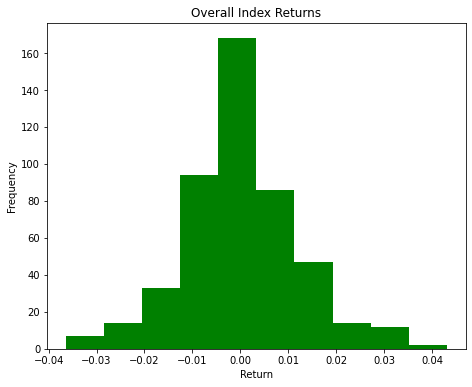

In [30]:
plt.hist(returns, bins=10, color="green")
plt.title("Overall Index Returns")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.gcf().set_size_inches(7.5, 6)
plt.show()

In [36]:
overall_mean = np.mean(returns*100)
overall_var = np.var(returns*100) 

In [37]:
print(f"mean = {round(overall_mean, 4)}, var = {round(overall_var, 3)}")

mean = 0.0265, var = 1.439


# Finpy TSE

In [4]:
!pip install finpy_tse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.5 MB/s eta 0:00:00
  Created wheel for unsync: filename=unsync-1.4.0-py3-none-any.whl size=4972 sha256=d14c5c4b1bcb63fb664446820cdba35abdd07585f6639f3bc107250bb1aa84ae
  Stored in directory: /root/.cache/pip/wheels/1d/ba/bb/d6977ef463ab9150e490fe3438c113ac828e1c845a6b09a611
Successfully built unsync


In [5]:
import pandas as pd
import finpy_tse as fpy

DF2 = fpy.Get_Price_History(
    stock='خودرو',
    start_date='1400-01-01',
    end_date='1401-01-01',
    ignore_date=False,
    adjust_price=False,
    show_weekday=False,
    double_date=False)

print(DF2)

KeyboardInterrupt: ignored

In [ ]:
import finpy_tse as tse

DF2 = tse.Get_CWI_History(start_date='1396-01-01',
                          end_date='1396-01-01',
                          ignore_date=False,
                          just_adj_close=False,
                          show_weekday=True,
                          double_date=True)

KeyboardInterrupt: ignored

In [ ]:
!pip install finpy-tse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import finpy_tse as fpy


In [ ]:
fpy.Get_Price_History(
    stock='خودرو',
    start_date='1400-01-01',
    end_date='1401-01-01',
    ignore_date=False,
    adjust_price=False,
    show_weekday=False,
    double_date=False)

ConnectionError: ignored